# Linear models figures generation

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn"t work
from plot_helpers import RCPARAMS
RCPARAMS.update({"figure.figsize": (5, 3)})   # good for screen
# RCPARAMS.update({"figure.figsize": (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# High-resolution please
%config InlineBackend.figure_format = "retina"

<Figure size 640x480 with 0 Axes>

In [3]:
# set random seed for repeatability
np.random.seed(42)

In [4]:
# import warnings
# silence kurtosistest warning when using n < 20
# warnings.filterwarnings("ignore", category=UserWarning)

## Section 4.1 — Simple linear regression

In [5]:
from ministats.plots.figures import plot_residuals
from ministats.plots.figures import plot_residuals2
from ministats.utils import savefigure

In [6]:
# Where to store figures
DESTDIR = "figures/lm/simple"

Saved figure to figures/lm/simple/linear_model_xy_with_gaussians.pdf
Saved figure to figures/lm/simple/linear_model_xy_with_gaussians.png


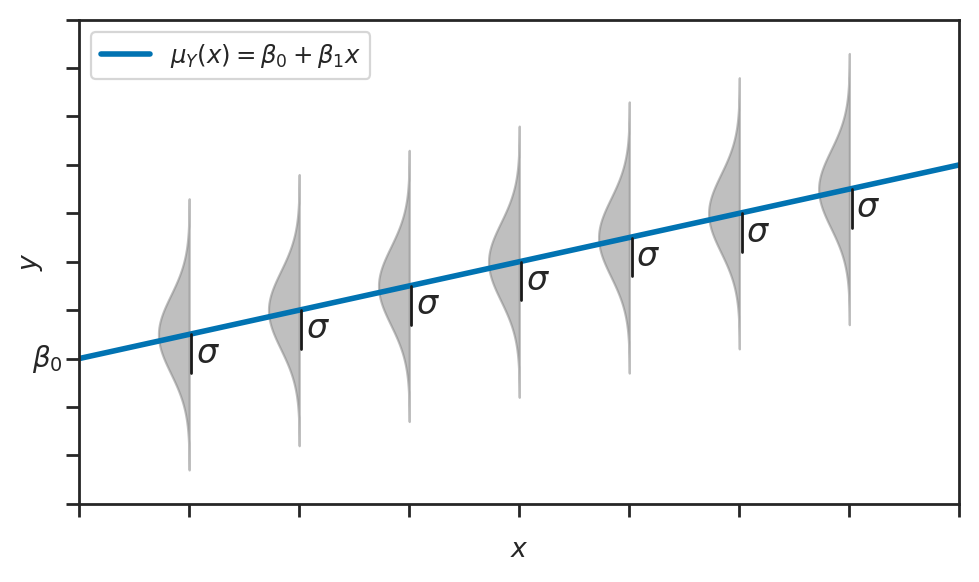

In [7]:
from scipy.stats import norm

# Define the linear model function
def linear_model(x):
    return 30 + 5 * x

# Define sigma for the normal distribution
sigma = 8

onepixel = 0.02

with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(5, 3))

    # Plot the linear model
    xs = np.linspace(0, 8, 200)
    ys = linear_model(xs)
    sns.lineplot(x=xs, y=ys, ax=ax, label=r"$\mu_Y(x) = \beta_0 + \beta_1x$", linewidth=2)
    
    # Plot Gaussian distributions at specified x positions and add sigma lines
    x_positions = range(1,8)
    for x_pos in x_positions:
        y_pos = linear_model(x_pos)
        ys = np.linspace(y_pos-3.5*sigma, y_pos+3.5*sigma, 100)
        pdf = 0.7*norm(loc=y_pos, scale=sigma).pdf(ys)
        ax.fill_betweenx(ys, x_pos - pdf * sigma, x_pos, color="grey", alpha=0.5)
        # Draw vertical sigma line and label it on the opposite side of the Gaussian shape
        ax.plot([x_pos+onepixel, x_pos+onepixel], [y_pos, y_pos - sigma], "k", lw=1)
        ax.text(x_pos + 0.06, y_pos - sigma / 2, r"$\sigma$", fontsize=12, va="center")

    # y-intercept
    ax.text(0 - 0.15, 30, r"$\beta_0$", fontsize=10, va="center", ha="right")

    # Set up x-axis
    ax.set_xlim([0, 8])
    ax.set_xlabel("$x$")
    ax.set_xticklabels([])
    
    # Set up y-axis
    ax.set_ylim([0, 100])
    ax.set_ylabel("$y$")
    ax.set_yticks(range(0,110,10))
    ax.set_yticklabels([])
    
    ax.legend(loc="upper left")

filename = os.path.join(DESTDIR, "linear_model_xy_with_gaussians.pdf")
savefigure(fig, filename)

### Example: students score as a function of effort

Saved figure to figures/lm/simple/students_scores_vs_effort_scatterplot.pdf
Saved figure to figures/lm/simple/students_scores_vs_effort_scatterplot.png


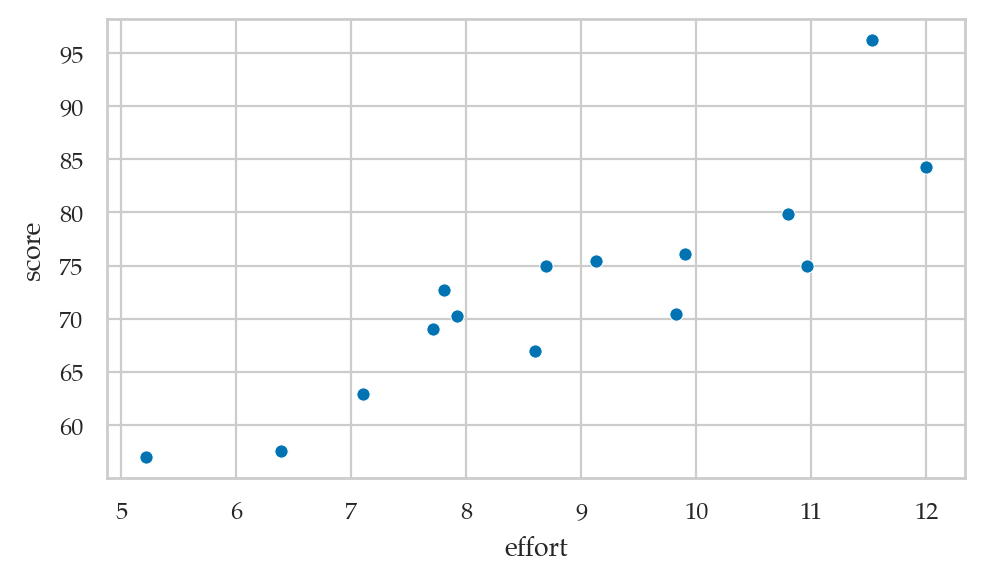

In [8]:
students = pd.read_csv("../datasets/students.csv")
efforts = students["effort"]
scores = students["score"]
sns.scatterplot(x=efforts, y=scores)

filename = os.path.join(DESTDIR, "students_scores_vs_effort_scatterplot.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/lm/simple/students_scores_vs_effort_with_line.pdf
Saved figure to figures/lm/simple/students_scores_vs_effort_with_line.png


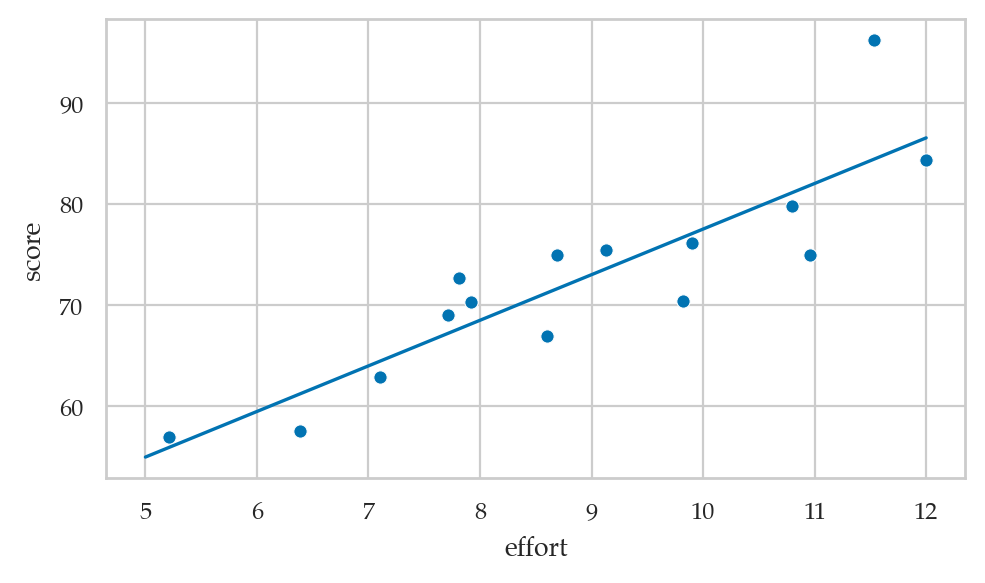

In [9]:
import statsmodels.formula.api as smf
lm1 = smf.ols("score ~ 1 + effort", data=students).fit()
b0, b1 = lm1.params

es = np.linspace(5, 12)
scorehats = b0 + b1*es
sns.lineplot(x=es, y=scorehats)
sns.scatterplot(x=efforts, y=scores)

filename = os.path.join(DESTDIR, "students_scores_vs_effort_with_line.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/lm/simple/students_scores_with_residuals.pdf
Saved figure to figures/lm/simple/students_scores_with_residuals.png


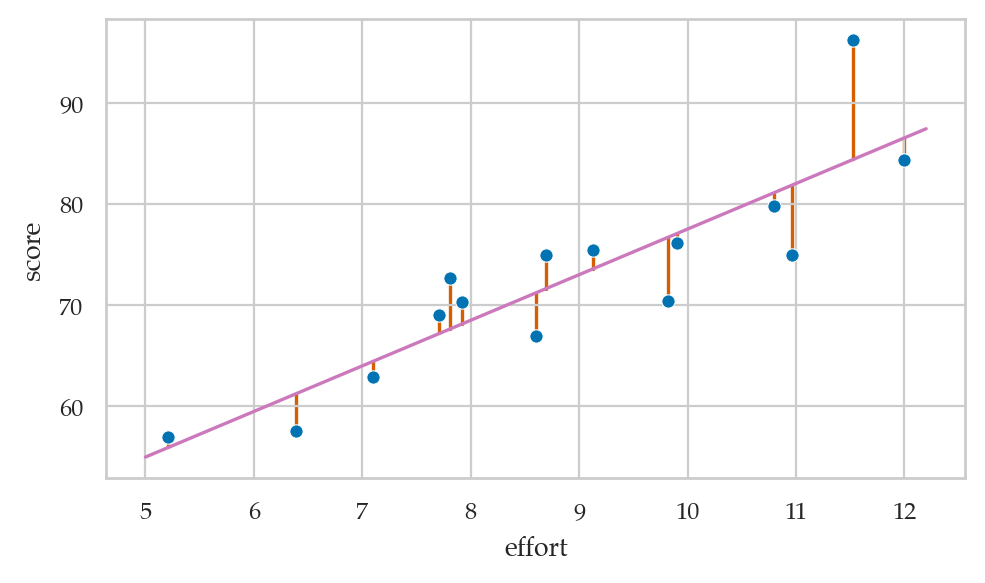

In [10]:
plot_residuals(efforts, scores, b0, b1)
sns.scatterplot(x=efforts, y=scores)
es = np.linspace(5, 12.2)
scorehats = b0 + b1*es
sns.lineplot(x=es, y=scorehats, color="C4");

filename = os.path.join(DESTDIR, "students_scores_with_residuals.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/lm/simple/students_scores_with_residuals_squared.pdf
Saved figure to figures/lm/simple/students_scores_with_residuals_squared.png


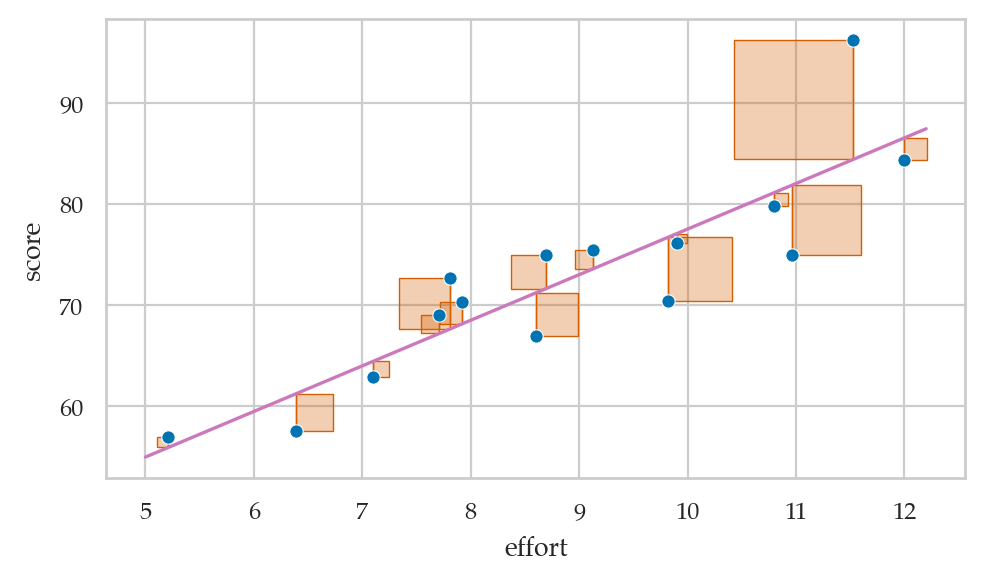

In [11]:
ax = sns.scatterplot(x=efforts, y=scores, zorder=4)
es = np.linspace(5, 12.2)
scorehats = b0 + b1*es
sns.lineplot(x=es, y=scorehats, color="C4", zorder=5)
plot_residuals2(efforts, scores, b0, b1, ax=ax);

filename = os.path.join(DESTDIR, "students_scores_with_residuals_squared.pdf")
savefigure(plt.gcf(), filename)

### Model diagnostics

Saved figure to figures/lm/simple/scatter_plots_of_nonlinear_relationships.pdf
Saved figure to figures/lm/simple/scatter_plots_of_nonlinear_relationships.png


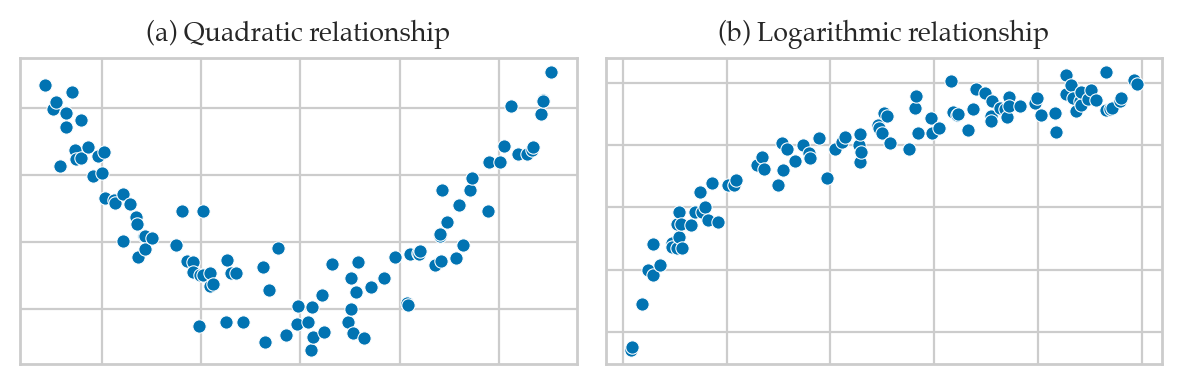

In [12]:
# FIGURES ONLY
from scipy.stats import uniform, norm

n = 100

# (a) quadratic
np.random.seed(42)
xqs = np.sort(uniform(-6.5, 13).rvs(n))
yqs = 0.4*xqs**2 + 2*norm(0,1).rvs(n)

# (b) logarithmic
np.random.seed(44)
xls = np.sort(uniform(0,50).rvs(n))
yls = np.log(xls) + 0.2*norm(0,1).rvs(n)

with plt.rc_context({"figure.figsize":(6,2)}):
    fig, axs = plt.subplots(1, 2)
    sns.scatterplot(x=xqs, y=yqs, ax=axs[0])
    axs[0].set_title("(a) Quadratic relationship")
    sns.scatterplot(x=xls, y=yls, ax=axs[1])
    axs[1].set_title("(b) Logarithmic relationship")
    for ax in axs:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    filename = os.path.join(DESTDIR, "scatter_plots_of_nonlinear_relationships.pdf")
    savefigure(fig, filename)

In [13]:
scorehats = b0 + b1*efforts
residuals = scores - scorehats

Saved figure to figures/lm/simple/residuals_plot_vs_scorehats.pdf
Saved figure to figures/lm/simple/residuals_plot_vs_scorehats.png


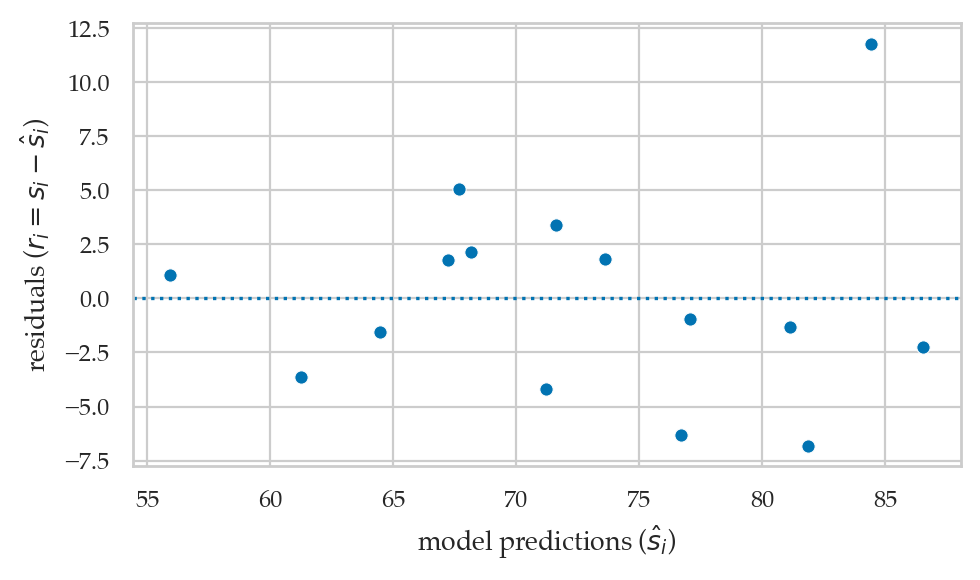

In [14]:
ax = sns.scatterplot(x=scorehats, y=residuals)
ax.set_xlabel("model predictions ($\\hat{s}_i$)")
ax.set_ylabel("residuals ($r_i = s_i - \\hat{s}_i$)")
ax.axhline(y=0, color="b", linestyle="dotted");

# FIGURES ONLY
filename = os.path.join(DESTDIR, "residuals_plot_vs_scorehats.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/lm/simple/residuals_plot_vs_effort_qqplot.pdf
Saved figure to figures/lm/simple/residuals_plot_vs_effort_qqplot.png


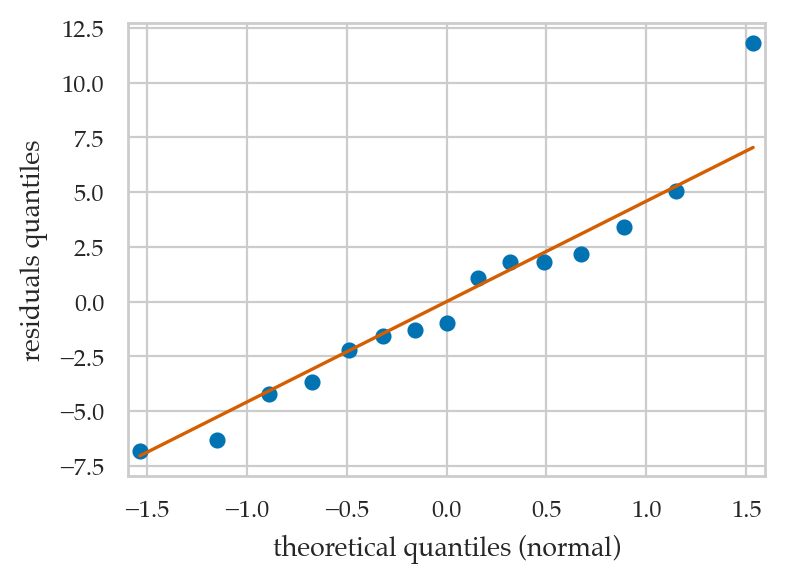

In [15]:
from statsmodels.graphics.api import qqplot
with plt.rc_context({"figure.figsize":(4,3)}):
    qqplot(residuals, line="s")

plt.xlabel("theoretical quantiles (normal)")
plt.ylabel("residuals quantiles")
filename = os.path.join(DESTDIR, "residuals_plot_vs_effort_qqplot.pdf")
savefigure(plt.gcf(), filename)

#### Residuals plots that show violated assumptions

In [16]:
from scipy.stats import uniform, lognorm, randint, norm

np.random.seed(42)
n = 100
xs = np.sort(uniform(0,10).rvs(n))

# (a) quadratic
np.random.seed(43)
y1s = 1.5*xs + 0.1*xs**2 + 0.5*norm(0,1).rvs(n)

# (b) clusters
np.random.seed(44)
y2s = []
K = 10  # number of clusters
batch_size = int(n/K)
for i in range(K):
    r = randint(0, 2).rvs(1)
    y2s_batch = 35*r - 10 + 6*norm(0,1).rvs(batch_size)
    y2s.extend(y2s_batch)

# (c) log-normal error term
np.random.seed(45)
y3s = 2.5*xs -3 + lognorm(1).rvs(n)

# (d) heteroscedasticity
np.random.seed(47)
sigmas = np.linspace(1, 20, n)
y4s = 1.7*xs + 0.9*norm(loc=0, scale=sigmas).rvs(n)

ysdf = pd.DataFrame({"x":xs, "y1":y1s, "y2":y2s, "y3":y3s, "y4":y4s})

Saved figure to figures/lm/simple/residuals_plots_with_violated_assumptions.pdf
Saved figure to figures/lm/simple/residuals_plots_with_violated_assumptions.png


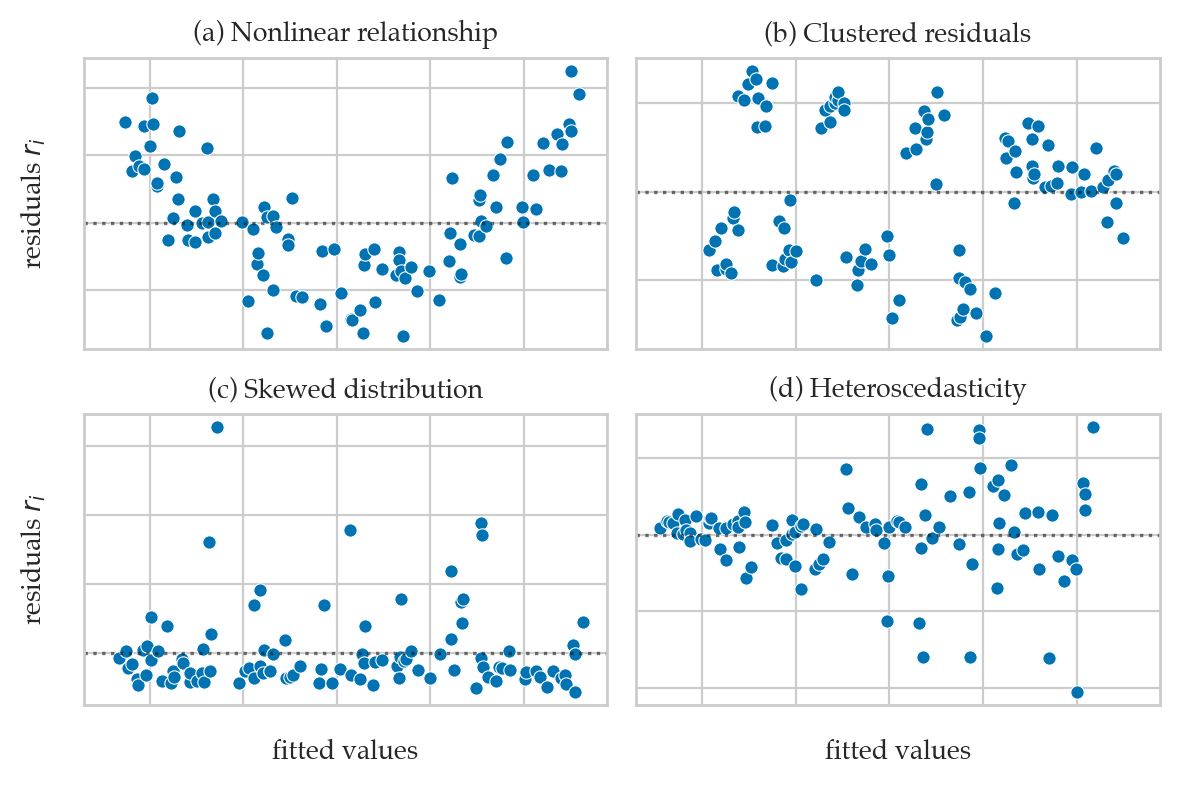

In [17]:
from ministats import plot_resid
import statsmodels.formula.api as smf

with plt.rc_context({"figure.figsize":(6,4)}):
    fig, axs_matrix = plt.subplots(2,2, sharex=True)
    axs = [ax for row in axs_matrix for ax in row]

    lmy1s = smf.ols("y1 ~ 1 + x", data=ysdf).fit()
    plot_resid(lmy1s, None, ax=axs[0])
    axs[0].set_xlabel(None)
    axs[0].set_title("(a) Nonlinear relationship")
    
    lmy2s = smf.ols("y2 ~ 1 + x", data=ysdf).fit()
    plot_resid(lmy2s, None, ax=axs[1])
    axs[1].set_xlabel(None)
    axs[1].set_ylabel(None)
    axs[1].set_title("(b) Clustered residuals")

    lmy3s = smf.ols("y3 ~ 1 + x", data=ysdf).fit()
    plot_resid(lmy3s, None, ax=axs[2])
    axs[2].set_title("(c) Skewed distribution")

    lmy4s = smf.ols("y4 ~ 1 + x", data=ysdf).fit()
    plot_resid(lmy4s, None, ax=axs[3])
    axs[3].set_ylabel(None)
    axs[3].set_title("(d) Heteroscedasticity")

    for ax in axs:
        ax.set_yticklabels([])
        ax.set_xticklabels([])

    filename = os.path.join(DESTDIR, "residuals_plots_with_violated_assumptions.pdf")
    savefigure(fig, filename)

### Using linear models to make predictions

Saved figure to figures/lm/simple/prediction_mean_score_vs_effort.pdf
Saved figure to figures/lm/simple/prediction_mean_score_vs_effort.png


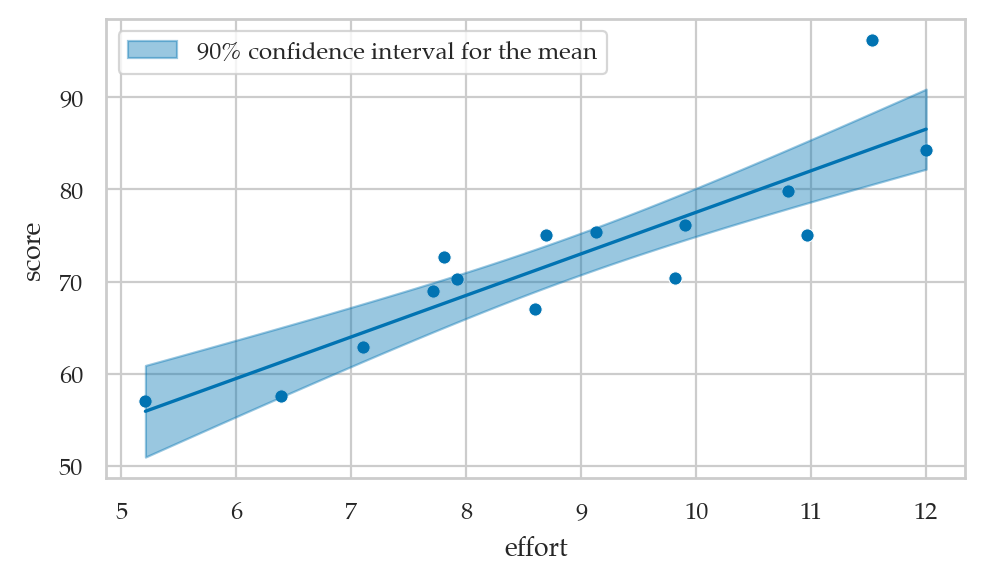

In [18]:
# FIGURES ONLY
from ministats import plot_reg
from ministats import plot_pred_bands
import statsmodels.formula.api as smf

lm1 = smf.ols("score ~ 1 + effort", data=students).fit()
plot_reg(lm1)
plot_pred_bands(lm1, ci_mean=True, alpha_mean=0.1)

filename = os.path.join(DESTDIR, "prediction_mean_score_vs_effort.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/lm/simple/prediction_values_score_vs_effort.pdf
Saved figure to figures/lm/simple/prediction_values_score_vs_effort.png


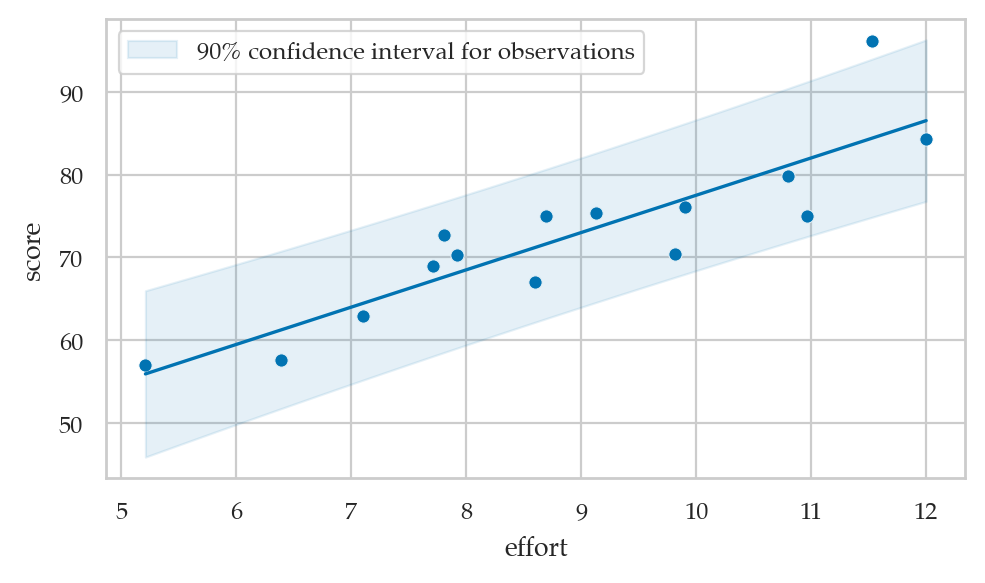

In [19]:
# FIGURES ONLY
plot_reg(lm1)
plot_pred_bands(lm1, ci_obs=True, alpha_obs=0.1)

filename = os.path.join(DESTDIR, "prediction_values_score_vs_effort.pdf")
savefigure(plt.gcf(), filename)

### Helper functions for plotting linear model results

Saved figure to figures/lm/simple/ministats_plot_reg_students_score_vs_effort.pdf
Saved figure to figures/lm/simple/ministats_plot_reg_students_score_vs_effort.png


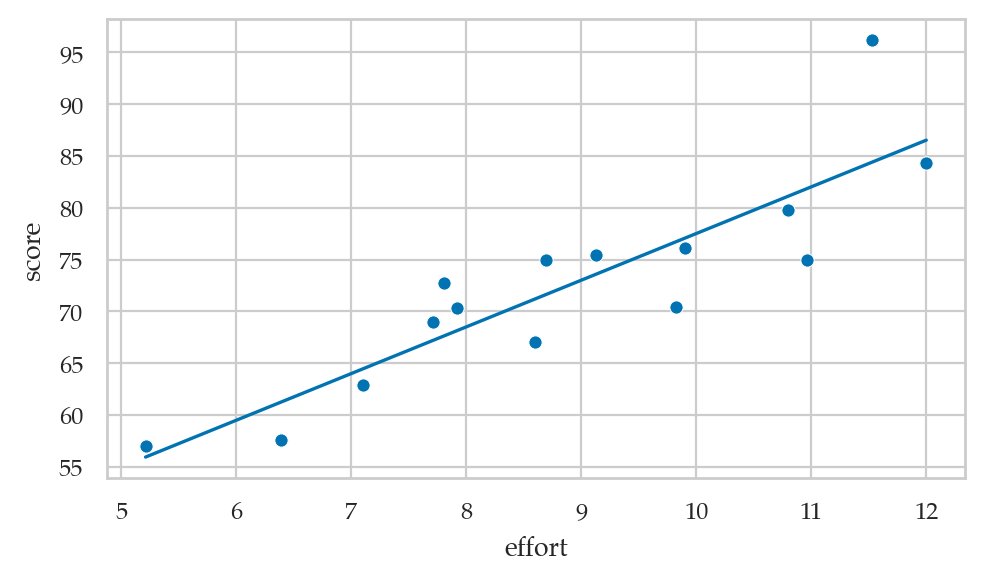

In [20]:
from ministats import plot_reg

plot_reg(lm1)

filename = os.path.join(DESTDIR, "ministats_plot_reg_students_score_vs_effort.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/lm/simple/ministats_plot_resid_students_score_vs_effort.pdf
Saved figure to figures/lm/simple/ministats_plot_resid_students_score_vs_effort.png


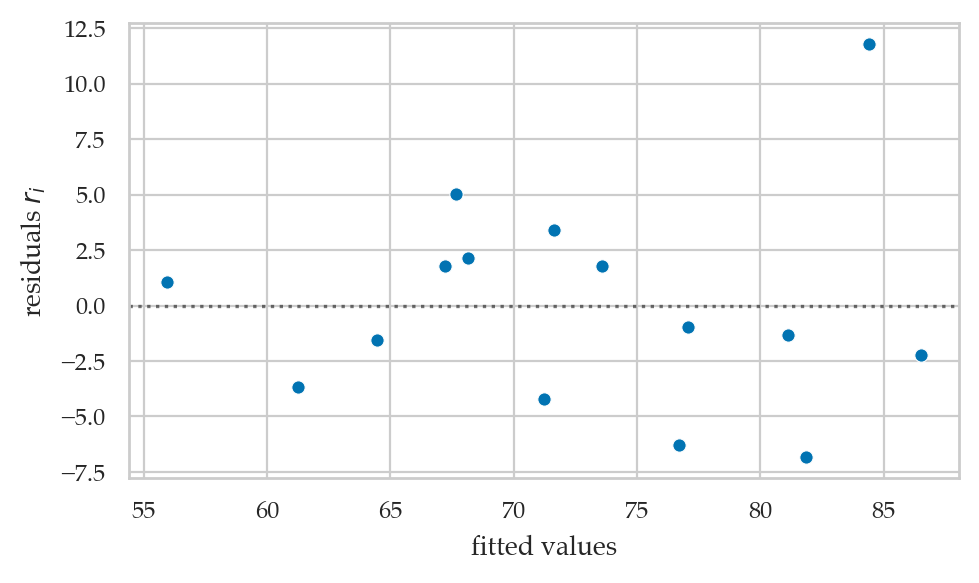

In [21]:
from ministats import plot_resid

plot_resid(lm1)

filename = os.path.join(DESTDIR, "ministats_plot_resid_students_score_vs_effort.pdf")
savefigure(plt.gcf(), filename)

### Seaborn functions for plotting linear models

#### Regression plot

Saved figure to figures/lm/simple/regplot_students_score_vs_effort.pdf
Saved figure to figures/lm/simple/regplot_students_score_vs_effort.png


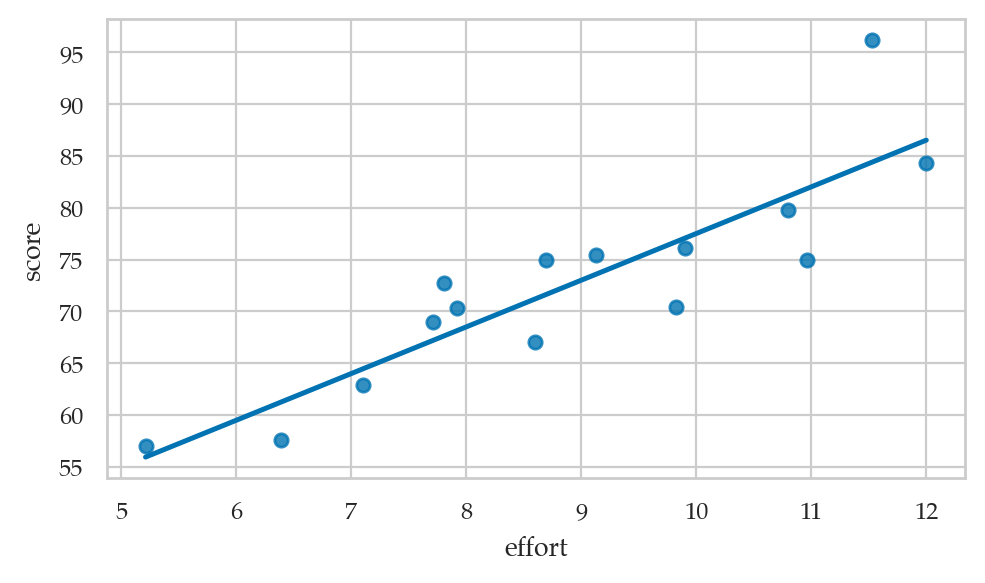

In [22]:
sns.regplot(x="effort", y="score", ci=None, data=students);

filename = os.path.join(DESTDIR, "regplot_students_score_vs_effort.pdf")
savefigure(plt.gcf(), filename)

#### Residual plot

Saved figure to figures/lm/simple/residplot_students_score_vs_effort.pdf
Saved figure to figures/lm/simple/residplot_students_score_vs_effort.png


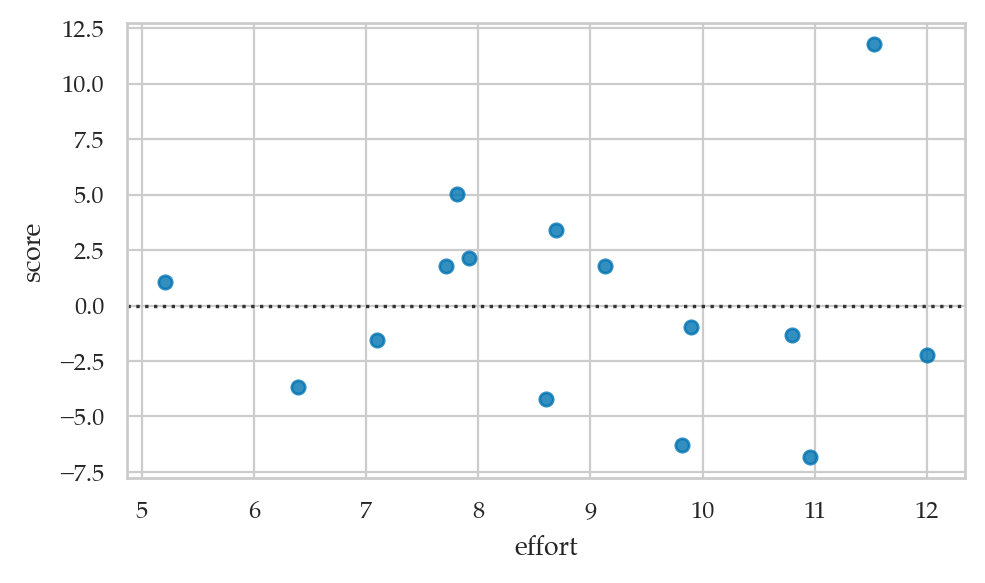

In [23]:
sns.residplot(x="effort", y="score", data=students);

filename = os.path.join(DESTDIR, "residplot_students_score_vs_effort.pdf")
savefigure(plt.gcf(), filename)

## Section 4.2 — Multiple linear regression

In [24]:
RCPARAMS.update({"figure.figsize": (5, 2.3)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

In [25]:
# Where to store figures
DESTDIR = "figures/lm/multiple"

In [26]:
doctors = pd.read_csv("../datasets/doctors.csv")
doctors.shape

(156, 9)

In [27]:
import statsmodels.formula.api as smf

formula = "score ~ 1 + alc + weed + exrc"
lm2 = smf.ols(formula, data=doctors).fit()
lm2.params

Intercept    60.452901
alc          -1.800101
weed         -1.021552
exrc          1.768289
dtype: float64

#### Partial regression plots

Saved figure to figures/lm/multiple/partial_regression_plot_alc.pdf
Saved figure to figures/lm/multiple/partial_regression_plot_alc.png


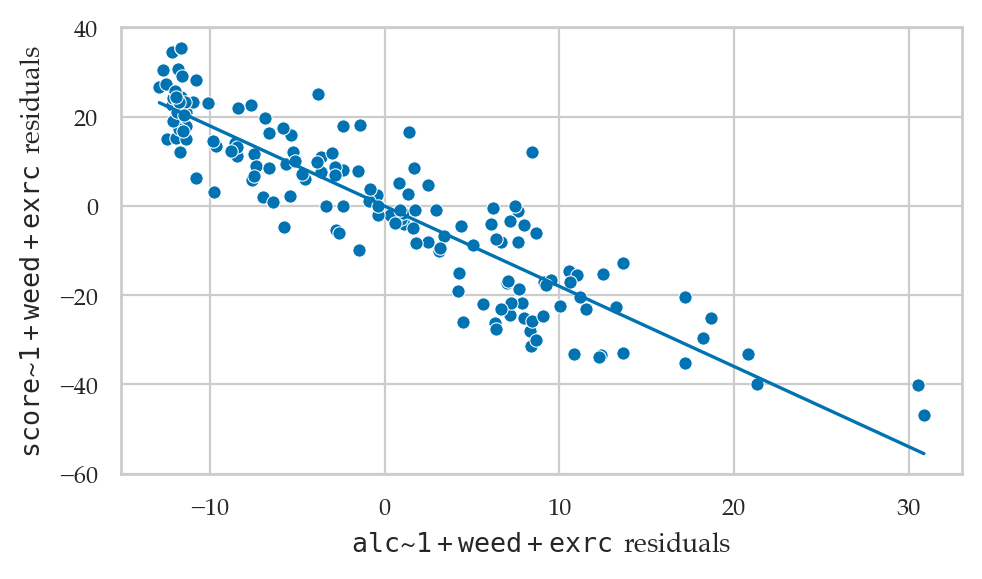

In [28]:
# FIGURES ONLY
from ministats import plot_partreg

with plt.rc_context({"figure.figsize":(5,3)}):
    plot_partreg(lm2, pred="alc");
    filename = os.path.join(DESTDIR, "partial_regression_plot_alc.pdf")
    savefigure(plt.gcf(), filename)

Saved figure to figures/lm/multiple/partial_regression_plots_weed_and_exrc.pdf
Saved figure to figures/lm/multiple/partial_regression_plots_weed_and_exrc.png


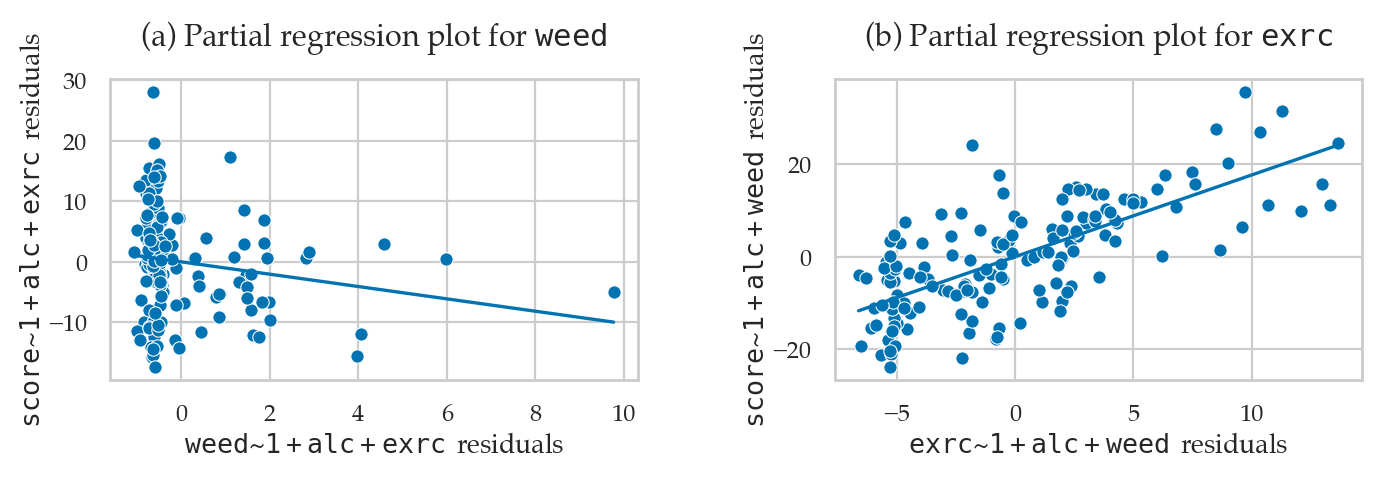

In [29]:
# FIGURES ONLY
from ministats import plot_partreg

with plt.rc_context({"figure.figsize":(7,2.5)}):
    fig, (ax2,ax3) = plt.subplots(1,2)
    # weed
    plot_partreg(lm2, pred="weed", ax=ax2)
    ax2.set_xticks([0,2,4,6,8,10])
    ax2.set_title("(a) Partial regression plot for $\\mathtt{weed}$", fontsize=11, pad=12)
    # exrc
    plot_partreg(lm2, pred="exrc", ax=ax3)
    ax3.set_xticks([-5,0,5,10])
    ax3.set_title("(b) Partial regression plot for $\\mathtt{exrc}$", fontsize=11, pad=12)

    for ax in [ax2,ax3]:
        xlabel = ax.get_xlabel()
        ax.set_xlabel(xlabel, labelpad=2)
        ylabel = ax.get_ylabel()
        ax.set_ylabel(ylabel, labelpad=0)

    filename = os.path.join(DESTDIR, "partial_regression_plots_weed_and_exrc.pdf")
    savefigure(plt.gcf(), filename, tight_layout_kwargs=dict(w_pad=4))

### Plot residuals

Saved figure to figures/lm/multiple/residuals_vs_fittedvalues.pdf
Saved figure to figures/lm/multiple/residuals_vs_fittedvalues.png


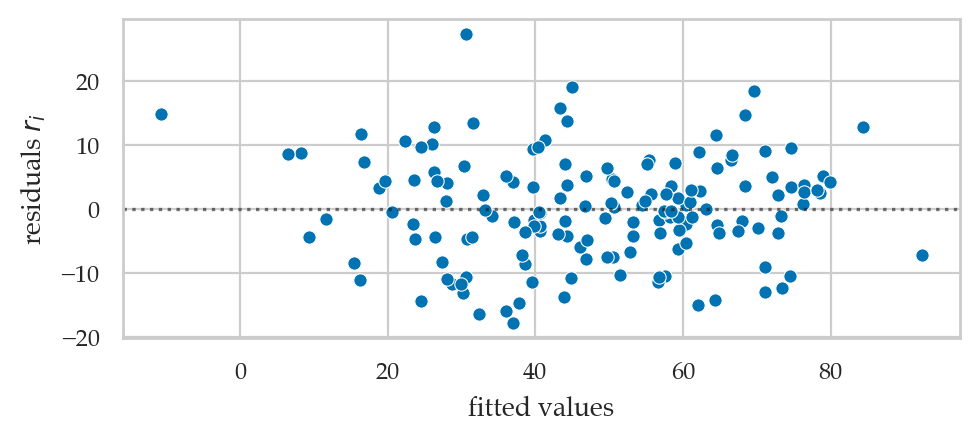

In [30]:
from ministats import plot_resid
plot_resid(lm2);

# FIGURES ONLY
filename = os.path.join(DESTDIR, "residuals_vs_fittedvalues.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/lm/multiple/residuals_vs_alc_weed_exrc.pdf
Saved figure to figures/lm/multiple/residuals_vs_alc_weed_exrc.png


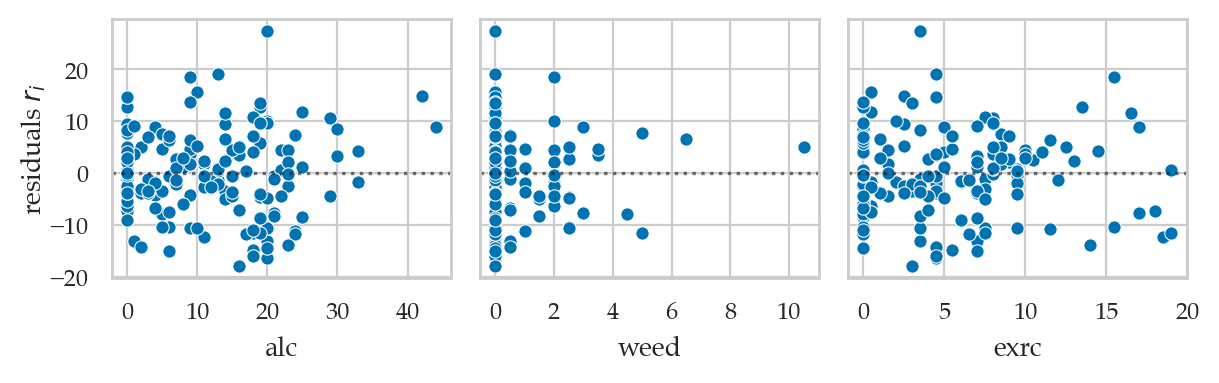

In [31]:
# FIGURES ONLY
with plt.rc_context({"figure.figsize":(6.2,2)}):
    fig, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True)
    plot_resid(lm2, pred="alc", ax=ax1)
    ax1.set_xticks([0,10,20,30,40])
    plot_resid(lm2, pred="weed", ax=ax2)
    ax2.set_xticks([0,2,4,6,8,10])
    plot_resid(lm2, pred="exrc", ax=ax3)
    ax3.set_xticks([0,5,10,15,20])
    ylabel = ax1.get_ylabel()
    ax1.set_ylabel(ylabel, labelpad=0)
    # fig.suptitle("Residuals plots of the three predictors", y=0.9)

    filename = os.path.join(DESTDIR, "residuals_vs_alc_weed_exrc.pdf")
    savefigure(plt.gcf(), filename)

### Nonlinear terms in linear regression

#### Example: polynomial regression

In [32]:
howell30 = pd.read_csv("../datasets/howell30.csv")
# Fit quadratic model
formula2 = "height ~ 1 + age + np.square(age)"
lmq = smf.ols(formula2, data=howell30).fit()
lmq.params

Intercept         64.708568
age                7.100854
np.square(age)    -0.137302
dtype: float64

Saved figure to figures/lm/multiple/howell_quadratic_fit_height_vs_age.pdf
Saved figure to figures/lm/multiple/howell_quadratic_fit_height_vs_age.png


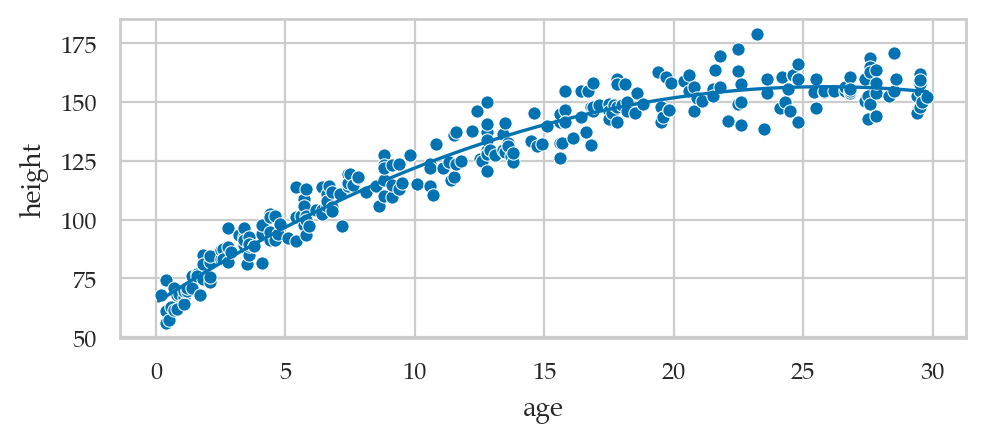

In [33]:
# Plot the data
sns.scatterplot(data=howell30, x="age", y="height");

# Plot the best-fit quadratic model
intercept, b_lin, b_quad = lmq.params
ages = np.linspace(0.1, howell30["age"].max())
heighthats = intercept + b_lin*ages + b_quad*ages**2
sns.lineplot(x=ages, y=heighthats, color="b");

filename = os.path.join(DESTDIR, "howell_quadratic_fit_height_vs_age.pdf")
savefigure(plt.gcf(), filename)

## Section 4.3 — Interpreting linear models


In [34]:
RCPARAMS.update({'figure.figsize': (5, 3)})
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)
DESTDIR = "figures/lm/interpreting"

Saved figure to figures/lm/interpreting/sleep_scores_resid_plots_with_lowess.pdf
Saved figure to figures/lm/interpreting/sleep_scores_resid_plots_with_lowess.png


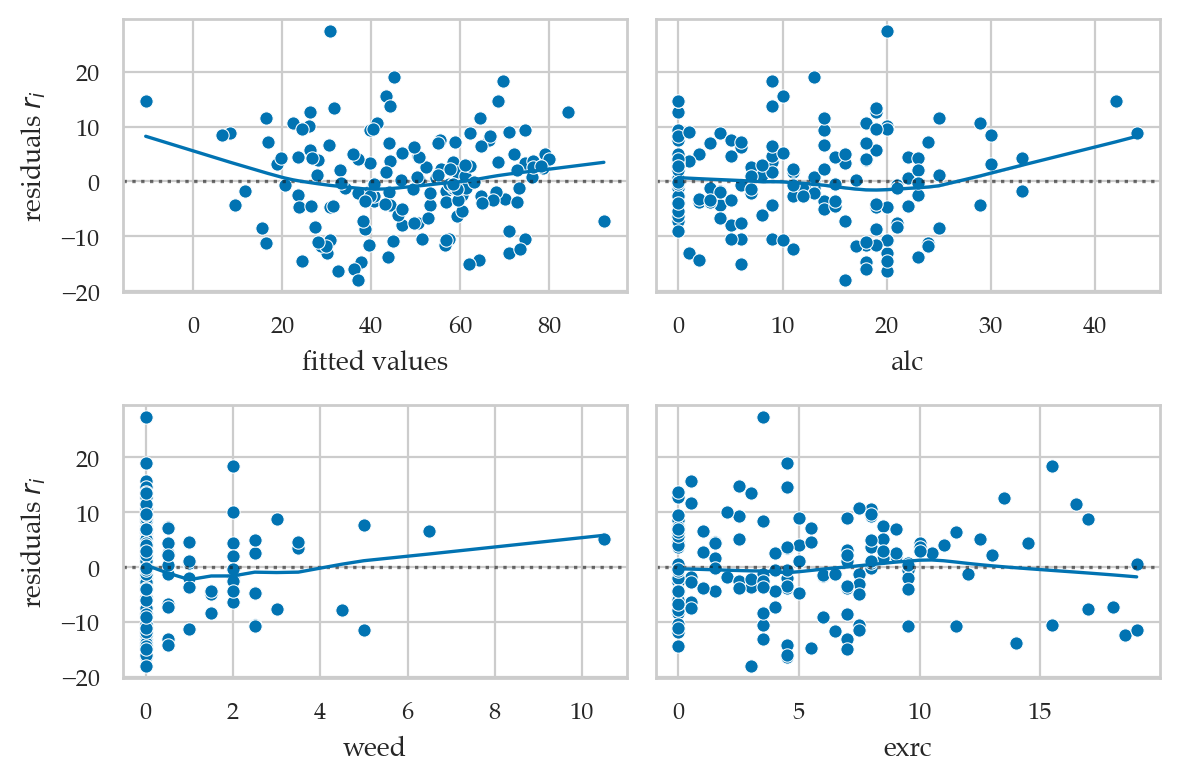

In [35]:
from ministats import plot_resid

with plt.rc_context({"figure.figsize":(6,4)}):
    fig, axs_matrix = plt.subplots(2,2, sharey=True)
    axs = [ax for row in axs_matrix for ax in row]

    plot_resid(lm2, pred=None,   lowess=True, ax=axs[0])
    plot_resid(lm2, pred="alc",  lowess=True, ax=axs[1])
    plot_resid(lm2, pred="weed", lowess=True, ax=axs[2])
    plot_resid(lm2, pred="exrc", lowess=True, ax=axs[3])

    filename = os.path.join(DESTDIR, "sleep_scores_resid_plots_with_lowess.pdf")
    savefigure(fig, filename)

Saved figure to figures/lm/interpreting/sleep_scores_resid_qqplot.pdf
Saved figure to figures/lm/interpreting/sleep_scores_resid_qqplot.png


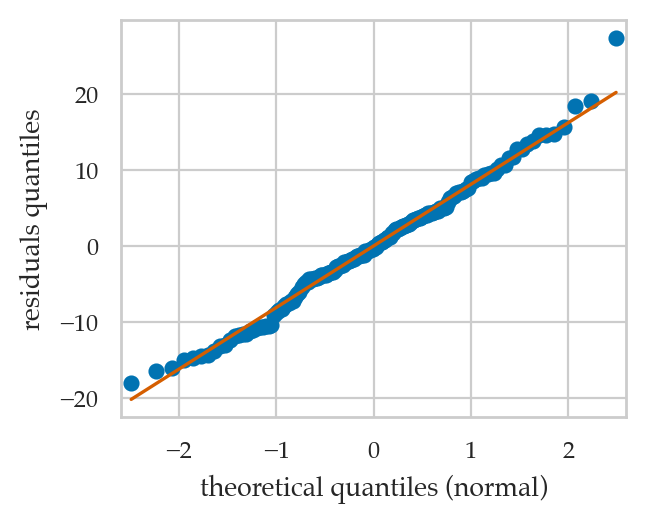

In [36]:
from statsmodels.graphics.api import qqplot
# qqplot(lm2.resid, line="s");

with plt.rc_context({"figure.figsize":(3.3,2.7)}):
    qqplot(lm2.resid, line="s");
    plt.xlabel("theoretical quantiles (normal)")
    plt.ylabel("residuals quantiles")

filename = os.path.join(DESTDIR, "sleep_scores_resid_qqplot.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/lm/interpreting/sleep_scores_scale-location_plot.pdf
Saved figure to figures/lm/interpreting/sleep_scores_scale-location_plot.png


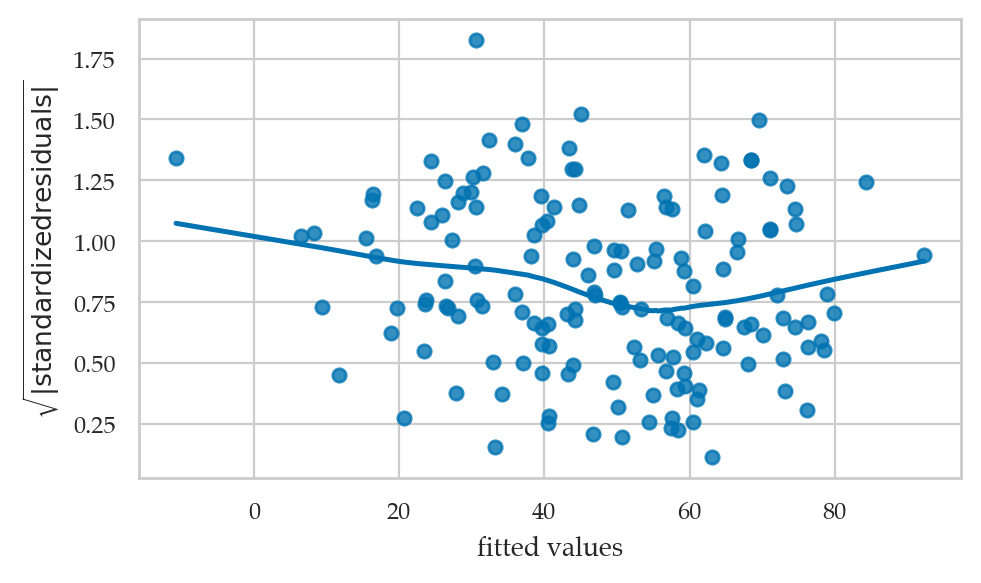

In [37]:
from ministats import plot_scaleloc

plot_scaleloc(lm2);

# FIGURES ONLY
filename = os.path.join(DESTDIR, "sleep_scores_scale-location_plot.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/lm/interpreting/panel_outlier_hl_influential.pdf
Saved figure to figures/lm/interpreting/panel_outlier_hl_influential.png


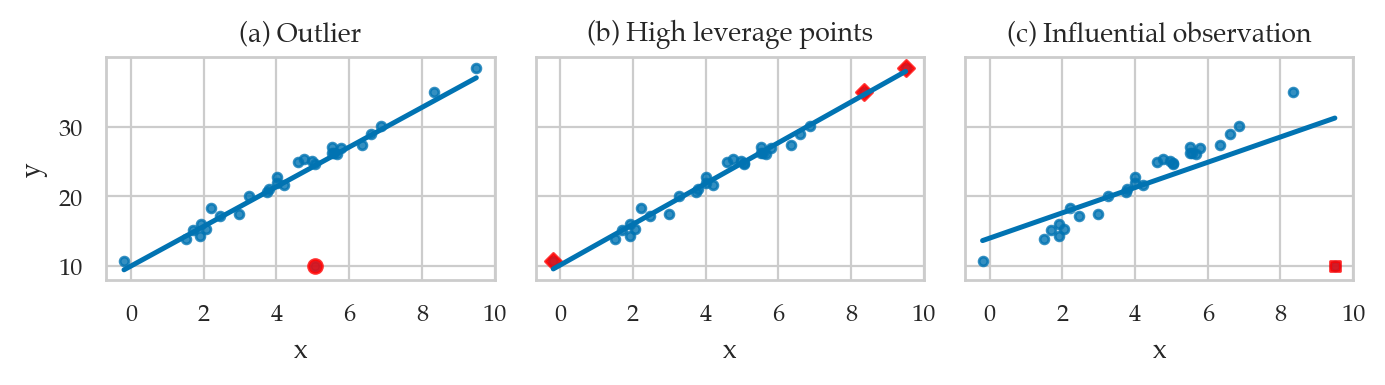

In [38]:
# FIGURES ONLY
from scipy.stats import norm

npts = 30
beta_0 = 10
beta_x = 3
sigma = 1

np.random.seed(45)

xs = norm(loc=5, scale=2).rvs(npts)
ys = beta_0 + beta_x*xs + norm(0,sigma).rvs(npts)
dfxys = pd.DataFrame({"x":xs, "y":ys})

# outlier near middle
idx_mid = dfxys[dfxys["x"]>5].sort_values("x").head(1).index[0]
y1s = dfxys["y"].copy()
y1s[idx_mid] = 10
dfxys["y1"] = y1s
mask_outl = (y1s == 10)
dfxys["outl"] = mask_outl

# high leverage points
dfxys["y2"] = ys
mask_hl = (dfxys["x"] < 1) | (dfxys["x"] > 7.5)
dfxys["hl"] = mask_hl


# influential point near end
idx_last = dfxys.sort_values("x").tail(1).index[0]
y3s = dfxys["y"].copy()
y3s[idx_last] = 10
dfxys["y3"] = y3s
mask_infl = (y3s == 10)
dfxys["infl"] = mask_infl


SIZE_SCATTER = 10


with plt.rc_context({"figure.figsize":(7,2)}):
    fig, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True)
    # fig.subplots_adjust(wspace=0.5)

    # (A) Outlier
    sns.regplot(x="x", y="y1", ci=False, data=dfxys,
                scatter_kws={"s":SIZE_SCATTER}, ax=ax1)
    dfoutl = dfxys[dfxys["outl"]==True]
    sns.regplot(x="x", y="y1", ci=False, data=dfoutl,
                fit_reg=False, color="red", scatter_kws={"s":25}, marker="o", ax=ax1)
    ax1.set_ylabel("y")
    # ax1.set_ylabel("$y_1$")
    ax1.set_xlabel("x")
    ax1.set_xticks(range(0,12,2))
    ax1.set_title("(a) Outlier")

    # (B) High leverage points
    sns.regplot(x="x", y="y2", ci=False, data=dfxys,
                scatter_kws={"s":SIZE_SCATTER},  ax=ax2)
    dfhl = dfxys[dfxys["hl"]==True]
    sns.regplot(x="x", y="y2", ci=False, data=dfhl,
                fit_reg=False, color="red", scatter_kws={"s":17}, marker="D", ax=ax2)
    # ax2.set_ylabel("$y_2$")
    ax2.set_ylabel(None)
    ax2.set_xlabel("x")
    ax2.set_xticks(range(0,12,2))
    ax2.set_title("(b) High leverage points")

    # (C) Influential observation
    sns.regplot(x="x", y="y3", ci=False, data=dfxys,
                scatter_kws={"s":SIZE_SCATTER},  ax=ax3)
    dfinfl = dfxys[dfxys["infl"]==True]
    sns.regplot(x="x", y="y3", ci=False, data=dfinfl,
                fit_reg=False, color="red", scatter_kws={"s":15}, marker="s", ax=ax3)
    # ax3.set_ylabel("$y_3$")
    ax3.set_ylabel(None)
    ax3.set_xlabel("x")
    ax3.set_xticks(range(0,12,2))
    ax3.set_title("(c) Influential observation")

    filename = os.path.join(DESTDIR, "panel_outlier_hl_influential.pdf")
    savefigure(fig, filename)

### Leverage plots

Saved figure to figures/lm/interpreting/lm2_plot_leverage_resid2.pdf
Saved figure to figures/lm/interpreting/lm2_plot_leverage_resid2.png


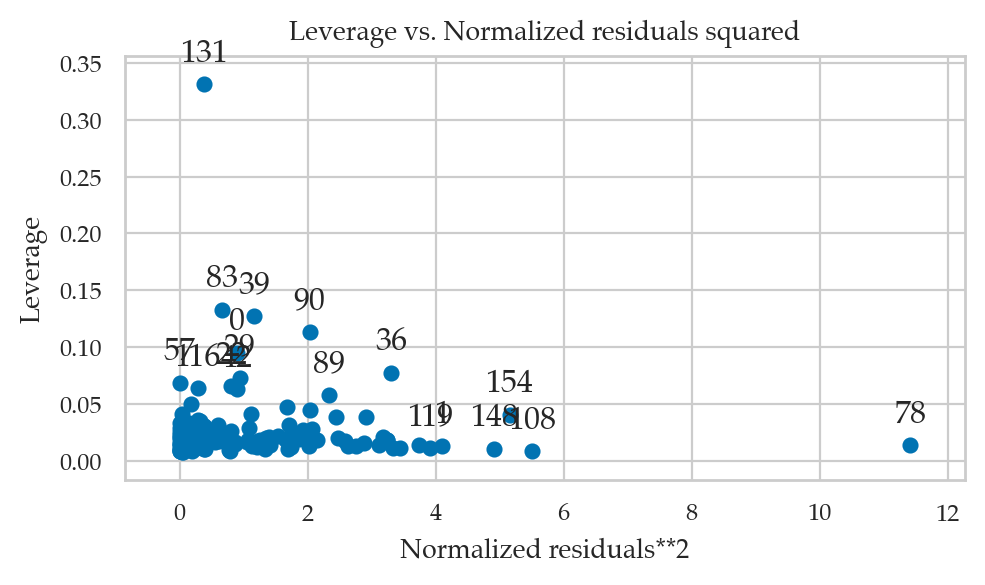

In [39]:
from statsmodels.graphics.api import plot_leverage_resid2

plot_leverage_resid2(lm2);

# FIGURES ONLY
filename = os.path.join(DESTDIR, "lm2_plot_leverage_resid2.pdf")
savefigure(plt.gcf(), filename)

### Influence plots

Saved figure to figures/lm/interpreting/lm2_influence_plot_cook.pdf
Saved figure to figures/lm/interpreting/lm2_influence_plot_cook.png


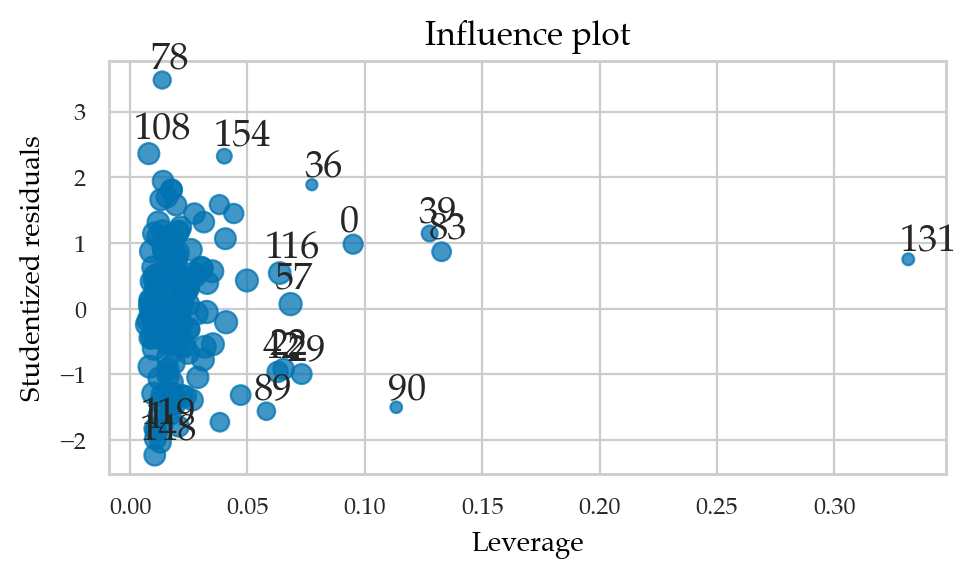

In [40]:
from statsmodels.graphics.api import influence_plot

influence_plot(lm2, criterion="cooks", size=4);

# FIGURES ONLY
ax = plt.gca()
title_font = 12
label_font = 10
ax.set_ylabel("Studentized residuals", fontsize=label_font)
ax.set_xlabel("Leverage", fontsize=label_font)
ax.set_title("Influence plot", fontsize=title_font)
filename = os.path.join(DESTDIR, "lm2_influence_plot_cook.pdf")
savefigure(plt.gcf(), filename)

## Section 4.4 — Regression with categorical predictors


In [41]:
RCPARAMS.update({'figure.figsize': (5, 1.6)})
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)
DESTDIR = "figures/lm/categorical"

### Example 1: binary predictor variable

In [42]:
import statsmodels.formula.api as smf
lmloc = smf.ols("score ~ 1 + C(loc)", data=doctors).fit()
lmloc.params

Intercept        52.956522
C(loc)[T.urb]    -6.992885
dtype: float64

Saved figure to figures/lm/categorical/doctors_scores_vs_loc_with_line.pdf
Saved figure to figures/lm/categorical/doctors_scores_vs_loc_with_line.png


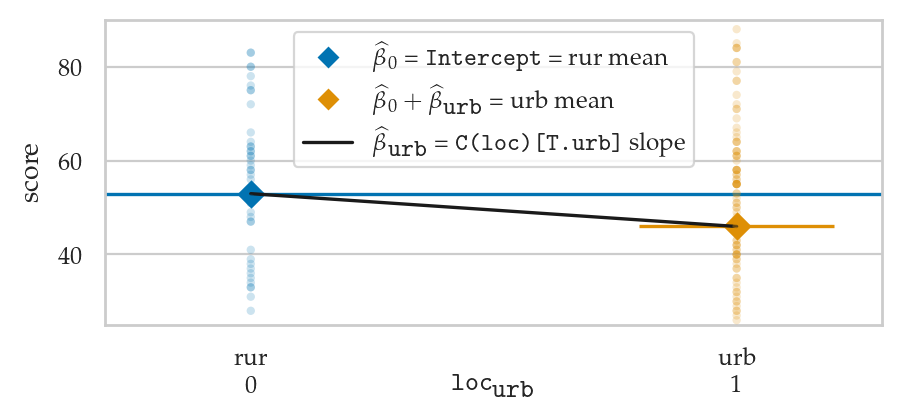

In [43]:
from ministats.plots.figures import plot_lm_ttest

with plt.rc_context({"figure.figsize":(4.6,2.2), "text.usetex":True}):
    ax = plot_lm_ttest(doctors, x="loc", y="score")
    ax.set_ylim([25,90])    
    sns.move_legend(ax, "upper center")
    filename = os.path.join(DESTDIR, "doctors_scores_vs_loc_with_line.pdf")
    savefigure(ax, filename)

### Example 2: predictors with three levels

In [44]:
lmw = smf.ols("score ~ 1 + C(work)", data=doctors).fit()
lmw.params

Intercept         46.545455
C(work)[T.eld]     4.569930
C(work)[T.hos]     2.668831
dtype: float64

Saved figure to figures/lm/categorical/doctors_scores_vs_work_with_lines.pdf
Saved figure to figures/lm/categorical/doctors_scores_vs_work_with_lines.png


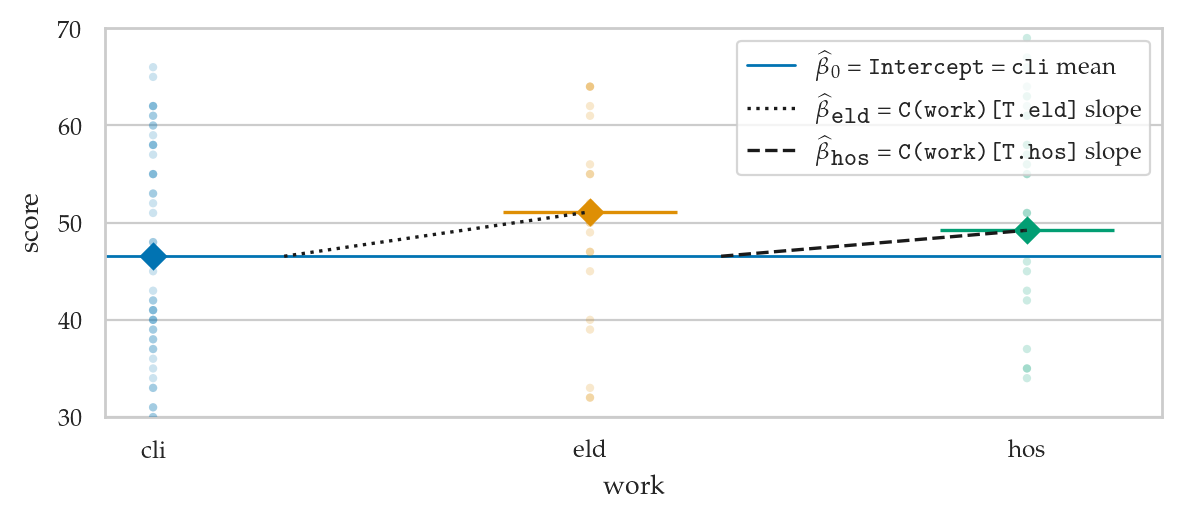

In [45]:
from ministats.plots.figures import plot_lm_anova

with plt.rc_context({"figure.figsize":(6,2.7), "text.usetex":True}):
    ax = plot_lm_anova(doctors, x="work", y="score")
    ax.set_ylim([30,70])
    sns.move_legend(ax, "upper right")
    filename = os.path.join(DESTDIR, "doctors_scores_vs_work_with_lines.pdf")
    savefigure(ax, filename)

### Two-sample t-test as a linear model

#### East vs. West electricity prices

In [46]:
eprices = pd.read_csv("../datasets/eprices.csv")
lme = smf.ols("price ~ 1 + C(loc)", data=eprices).fit()
print(lme.params)
lme.tvalues.iloc[1], lme.pvalues.iloc[1]

Intercept         6.155556
C(loc)[T.West]    3.000000
dtype: float64


(5.02287551327646, 0.00012497067987678602)

Saved figure to figures/lm/categorical/plot_lm_ttest_for_eprices.pdf
Saved figure to figures/lm/categorical/plot_lm_ttest_for_eprices.png


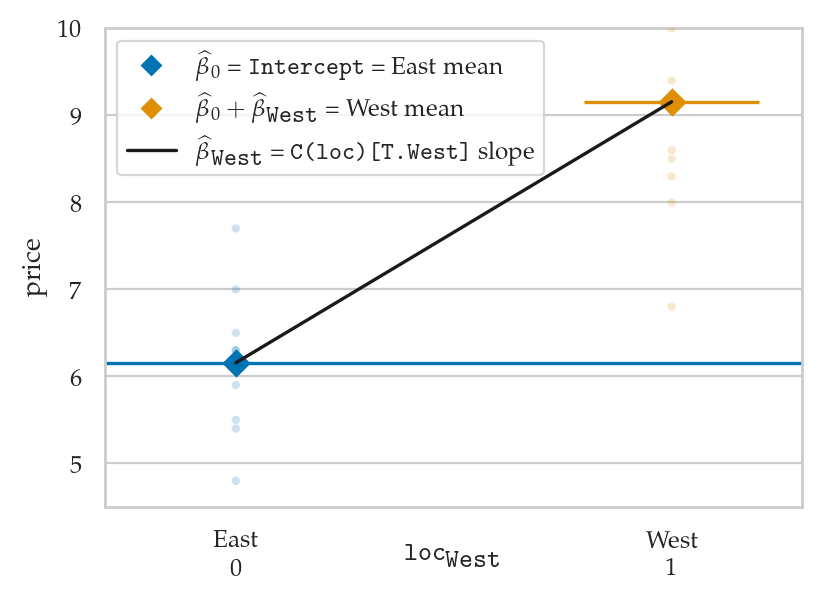

In [47]:
from ministats.plots.figures import plot_lm_ttest

with plt.rc_context({"figure.figsize":(4.2,3.1), "text.usetex":True}):
    ax = plot_lm_ttest(eprices, x="loc", y="price")
    ax.set_ylim([4.5,10])    
    sns.move_legend(ax, "upper left")
    ax.xaxis.set_label_coords(0.5, -0.07)
    filename = os.path.join(DESTDIR, "plot_lm_ttest_for_eprices.pdf")
    savefigure(ax, filename)